## Scaling

In [71]:
# data manipulation
import pandas as pd
import numpy as np
import scipy.io.arff

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

%matplotlib inline

In [72]:
# carregando o dataset
data, meta = scipy.io.arff.loadarff(f'data/speeddating.arff')
df = pd.DataFrame(data)

# Convertendo byte-strings para strings
str_df = df.select_dtypes([object]).stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]

# ajeitar o tipo dos dados
nominal_cols = [col for col, dtype in zip(meta.names(), meta.types()) if dtype == 'nominal']
for col in nominal_cols:
    df[col] = df[col].astype('category')

In [73]:
X = df.drop(columns="match")
y = df["match"]

# pre processamento para conseguir testar as técnicas (não pode ter valores ausentes)
# nem valores categóricos
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col].fillna(X[col].median(), inplace=True)

    elif pd.api.types.is_categorical_dtype(X[col]):
        X[col].fillna(X[col].mode()[0], inplace=True)
        dummies = pd.get_dummies(X[col], prefix=col)
        X.drop(columns=col, inplace=True)
        X = pd.concat([X, dummies], axis=1)

C:\Users\caiop\AppData\Local\Temp\ipykernel_3428\2883123681.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(X[col]):
C:\Users\caiop\AppData\Local\Temp\ipykernel_3428\2883123681.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)
C:\Users\caiop\AppData\Local\Temp\ipykernel_3428\2883123681.py:8: FutureWarning: A value is trying to be set 

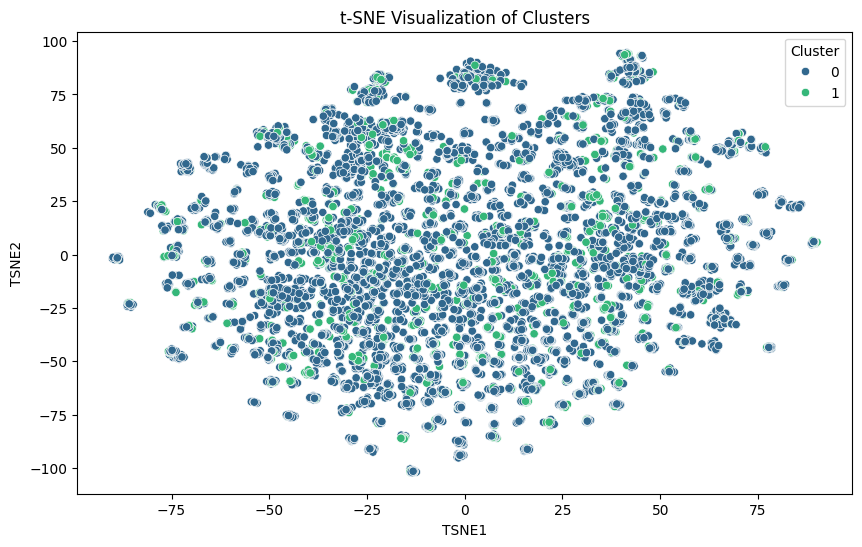

In [74]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_embedded = tsne.fit_transform(X)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters")
plt.show()

In [75]:
numeric_columns = X.select_dtypes(include=['number'])
# dropando colunas com dados binários	
numeric_columns.drop(
    columns=[
        'wave', 'met', 'like'
        ],
      inplace=True
    )
numeric_columns = numeric_columns.columns

In [76]:
def MinMaxScaling(df):
    scaler = MinMaxScaler()
    df = scaler.fit_transform(df)
    return df

In [77]:
df_minmax = X.copy()
df_minmax[numeric_columns] = MinMaxScaling(df_minmax[numeric_columns])
df_minmax.head()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,d_like_[0-5],d_like_[6-8],d_like_[9-10],d_guess_prob_liked_[0-4],d_guess_prob_liked_[5-6],d_guess_prob_liked_[7-10],decision_0,decision_1,decision_o_0,decision_o_1
0,1.0,0.081081,0.243243,0.162162,0.2,0.333333,0.35,0.333333,0.40,0.40,...,False,True,False,False,True,False,False,True,True,False
1,1.0,0.081081,0.108108,0.027027,0.2,0.333333,0.60,0.000000,0.00,0.80,...,False,True,False,False,True,False,False,True,True,False
2,1.0,0.081081,0.108108,0.027027,0.2,0.333333,0.19,0.300000,0.38,0.36,...,False,True,False,True,False,False,False,True,False,True
3,1.0,0.081081,0.135135,0.054054,0.2,0.333333,0.30,0.083333,0.30,0.80,...,False,True,False,False,True,False,False,True,False,True
4,1.0,0.081081,0.162162,0.081081,0.2,0.333333,0.30,0.166667,0.40,0.20,...,False,True,False,False,True,False,False,True,False,True


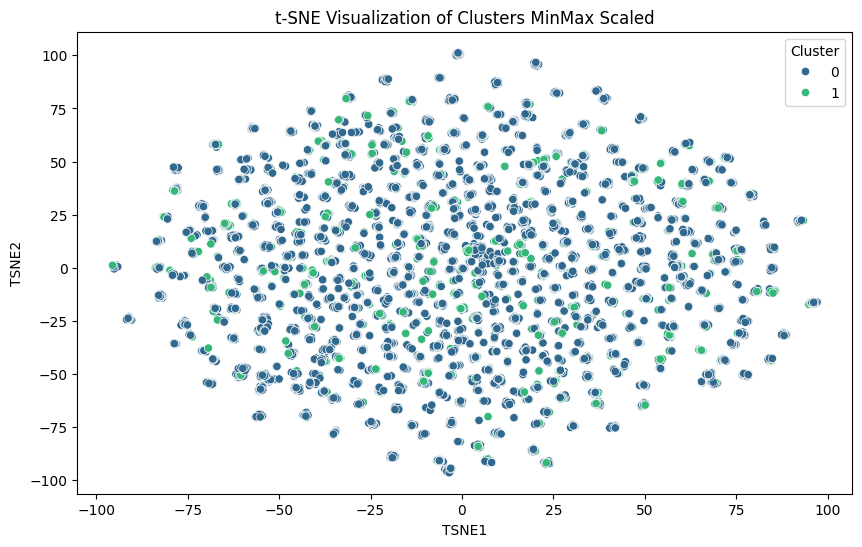

In [88]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_minmax_numeric = df_minmax[numeric_columns]
df_embedded = tsne.fit_transform(df_minmax_numeric)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters MinMax Scaled")
plt.show()

In [79]:
def StandardScaling(df):
    scaler = StandardScaler()
    df= scaler.fit_transform(df)
    return df

In [80]:
df_standard = X.copy()
df_standard[numeric_columns] = StandardScaling(df_standard[numeric_columns])
df_standard.head()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,d_like_[0-5],d_like_[6-8],d_like_[9-10],d_guess_prob_liked_[0-4],d_guess_prob_liked_[5-6],d_guess_prob_liked_[7-10],decision_0,decision_1,decision_o_0,decision_o_1
0,1.0,-1.509911,0.180583,0.394786,-0.627366,0.126946,1.002114,0.370041,-0.039707,0.418855,...,False,True,False,False,True,False,False,True,True,False
1,1.0,-1.509911,-1.231257,-0.693141,-0.627366,0.126946,3.001359,-2.484339,-3.004242,3.724781,...,False,True,False,False,True,False,False,True,True,False
2,1.0,-1.509911,-1.231257,-0.693141,-0.627366,0.126946,-0.277402,0.084603,-0.187934,0.088263,...,False,True,False,True,False,False,False,True,False,True
3,1.0,-1.509911,-0.948889,-0.475556,-0.627366,0.126946,0.602265,-1.770744,-0.780841,3.724781,...,False,True,False,False,True,False,False,True,False,True
4,1.0,-1.509911,-0.666521,-0.257970,-0.627366,0.126946,0.602265,-1.057149,-0.039707,-1.234108,...,False,True,False,False,True,False,False,True,False,True


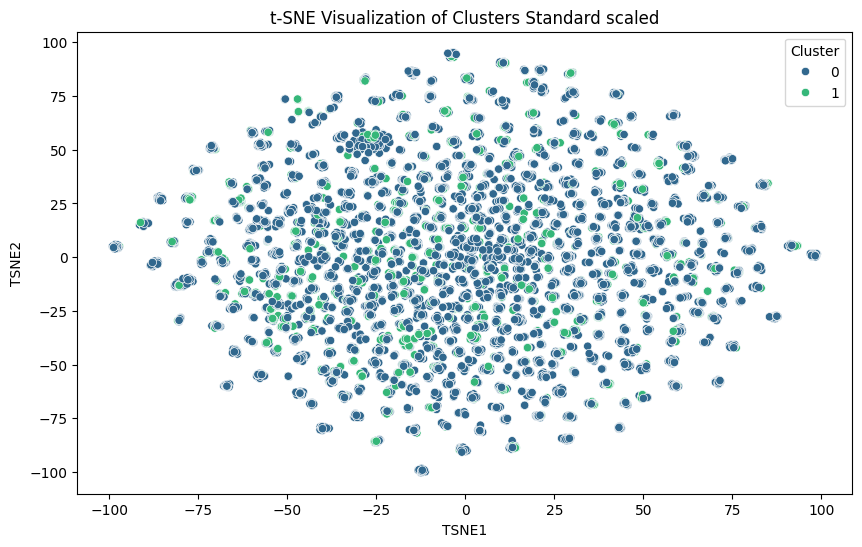

In [87]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_standard_numeric = df_standard[numeric_columns]
df_embedded = tsne.fit_transform(df_standard_numeric)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters Standard scaled")
plt.show()

In [82]:
def RobustScaling(df):
    scaler = RobustScaler()
    df = scaler.fit_transform(df)
    return df

In [84]:
df_robust = X.copy()
df_robust[numeric_columns] = RobustScaling(df_robust[numeric_columns])
df_robust.head()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,d_like_[0-5],d_like_[6-8],d_like_[9-10],d_guess_prob_liked_[0-4],d_guess_prob_liked_[5-6],d_guess_prob_liked_[7-10],decision_0,decision_1,decision_o_0,decision_o_1
0,1.0,-1.25,0.25,0.75,-0.2,0.2,1.5,0.326,0.000000,0.4,...,False,True,False,False,True,False,False,True,True,False
1,1.0,-1.25,-1.00,-0.50,-0.2,0.2,4.0,-3.674,-3.565062,4.4,...,False,True,False,False,True,False,False,True,True,False
2,1.0,-1.25,-1.00,-0.50,-0.2,0.2,-0.1,-0.074,-0.178253,0.0,...,False,True,False,True,False,False,False,True,False,True
3,1.0,-1.25,-0.75,-0.25,-0.2,0.2,1.0,-2.674,-0.891266,4.4,...,False,True,False,False,True,False,False,True,False,True
4,1.0,-1.25,-0.50,0.00,-0.2,0.2,1.0,-1.674,0.000000,-1.6,...,False,True,False,False,True,False,False,True,False,True


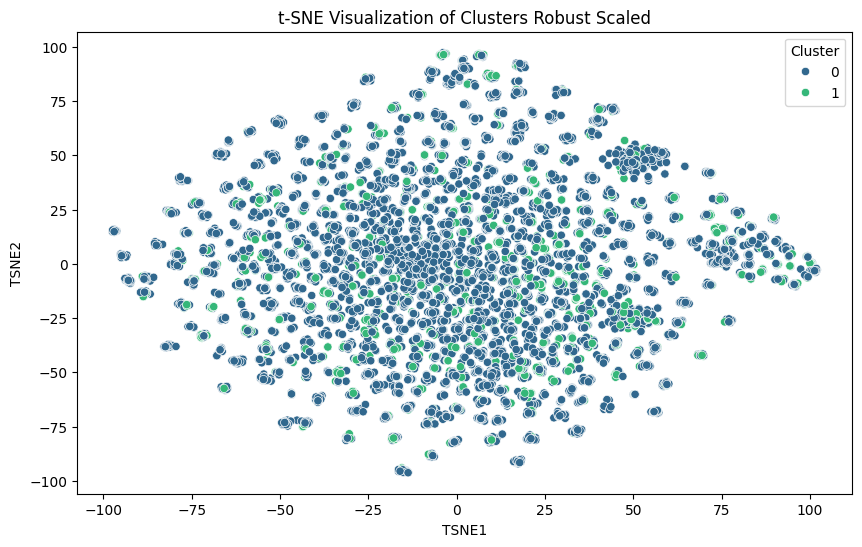

In [86]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_robust_numeric = df_robust[numeric_columns]
df_embedded = tsne.fit_transform(df_robust_numeric)

# Convert to DataFrame
df_tsne = pd.DataFrame(df_embedded, columns=["TSNE1", "TSNE2"])

df_tsne["Cluster"] = y

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="viridis", data=df_tsne)
plt.title("t-SNE Visualization of Clusters Robust Scaled")
plt.show()